In [3664]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (12,6)
legend_fontsize = 16

In [3665]:
data = pd.read_csv(
    'owid-covid-data.csv', 
    delimiter=','
)

In [3666]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262418,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262419,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262420,ZWE,Africa,Zimbabwe,2023-03-05,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262421,ZWE,Africa,Zimbabwe,2023-03-06,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3667]:
data_rus=data[data.location == 'Russia']

In [3668]:
data_rus['date']

193504    2020-01-31
193505    2020-02-01
193506    2020-02-02
193507    2020-02-03
193508    2020-02-04
             ...    
194631    2023-03-03
194632    2023-03-04
194633    2023-03-05
194634    2023-03-06
194635    2023-03-07
Name: date, Length: 1132, dtype: object

In [3669]:
import datetime as dt
my_date = "03.03.2020"
my_dt = dt.datetime.strptime(my_date, '%d.%m.%Y')

In [3670]:
my_dt

datetime.datetime(2020, 3, 3, 0, 0)

In [3671]:
data_rus['date'] = pd.to_datetime(data_rus['date'], format='%Y-%m-%d')

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_23236/2318712398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rus['date'] = pd.to_datetime(data_rus['date'], format='%Y-%m-%d')


In [3672]:
df=data_rus[data_rus.date >= my_dt]

In [3673]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
193536,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
193537,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
193538,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
193539,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
193540,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194631,RUS,Europe,Russia,2023-03-03,22002485.0,14375.0,11624.571,388240.0,39.0,34.286,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
194632,RUS,Europe,Russia,2023-03-04,22016406.0,13921.0,12049.143,388278.0,38.0,35.000,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
194633,RUS,Europe,Russia,2023-03-05,22029824.0,13418.0,12606.000,388320.0,42.0,36.714,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
194634,RUS,Europe,Russia,2023-03-06,22040875.0,11051.0,12830.857,388355.0,35.0,37.714,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [3674]:
df = df[['date', 'total_cases', 'new_cases']]

In [3675]:
df_train = df[:50]

In [3676]:
df_train.head()

,date,total_cases,new_cases
193536,2020-03-03,3.0,0.0
193537,2020-03-04,3.0,0.0
193538,2020-03-05,4.0,1.0
193539,2020-03-06,13.0,9.0
193540,2020-03-07,13.0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


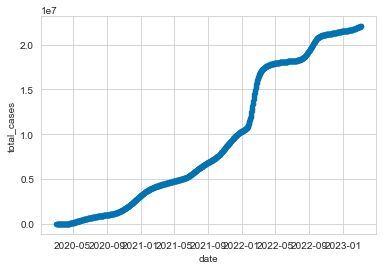

In [3677]:
df.plot.scatter(x="date", y="total_cases");

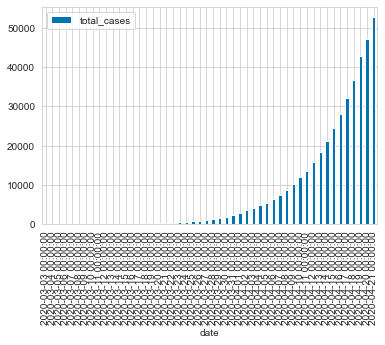

In [3678]:
df_train.plot.bar(x="date", y="total_cases");

In [3679]:
import numpy as np

In [3680]:
x = np.arange(1, 51, 1)
y = np.array(df_train['total_cases'])

In [3681]:
len(x)

50

Обучим регрессию, на первых 50-ти точках данных

In [3682]:
fit = np.polyfit(x, np.log(y), 1)

Получаем веса:

In [3683]:
print(fit)

[0.19829091 1.62244624]


In [3684]:
x_val=182

In [3685]:
print("Количество заразившихся на x-й день начиная с 3 марта:", int(0.2155719*1.35512388**x_val))

Количество заразившихся на x-й день начиная с 3 марта: 225823884870300152627200


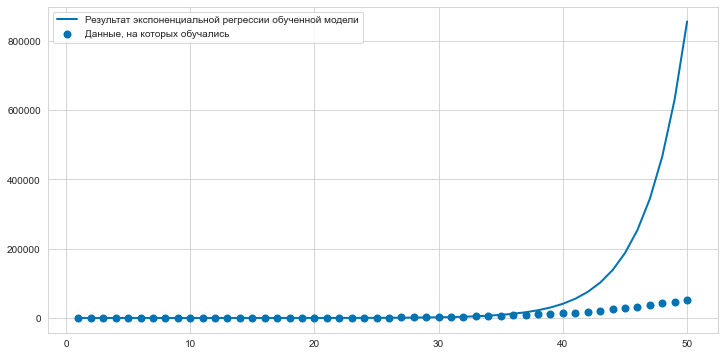

In [3686]:
N = 250
true_mu = [0.2155719 , 1.35512388]
def res_curve(x):
    return true_mu[0]*true_mu[1]**x
r = 50
xs = np.arange(1, r+1, 1)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, res_curve(xs), linewidth=2, label=r"Результат экспоненциальной регрессии обученной модели")
ax.scatter(xs, np.array(df['total_cases'][:r]), linewidth=2, label=r"Данные, на которых обучались")
ax.legend(loc="upper left", fontsize=10)
plt.show()


In [3687]:
# xs = np.linspace(-3, 3, N)
X = np.linspace(-0.1, 0.5, N)
Y = np.linspace(1.1, 1.7, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((0.0, 0.5))
    plt.ylim((1.0, 1.7))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(true_mu[0], true_mu[1], marker='*', s=120)

(250, 250)


C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_23236/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


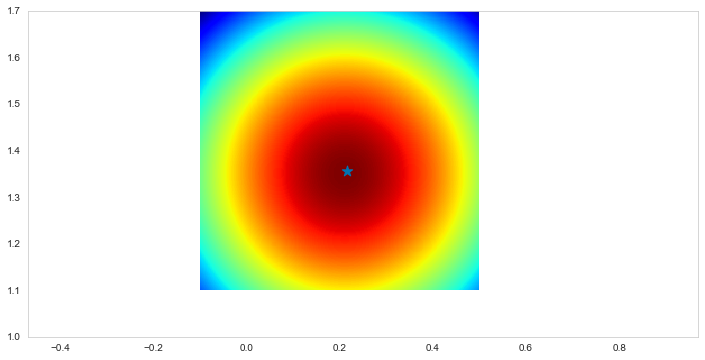

In [3688]:
cur_mu, cur_sigma = np.array([0.21, 1.35]), 2*np.array([[0.1, 0], [0, 0.1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 5))
myplot_heatmap(Z)

In [3689]:
xs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [3690]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(xs, w[0]*w[1]**xs, 'k-', lw=.6)
    plt.ylim((-300, 300))
    plt.xlim((0, 30))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

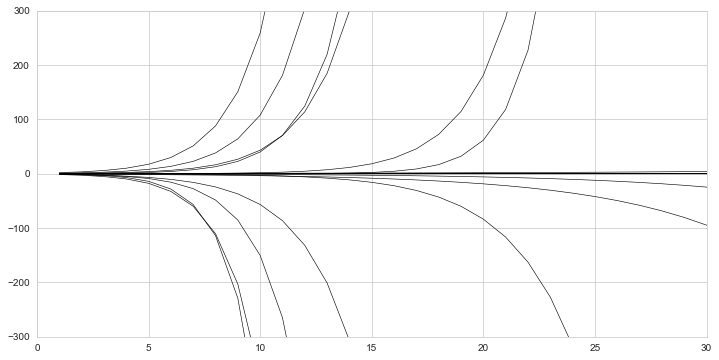

In [3691]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_xlim((-30, 30))
ax.set_ylim((-3, 3))
myplot_sample_lines(cur_mu, cur_sigma, 20)

<function get_likelihood.<locals>.<lambda> at 0x0000021A7D584430>
250


C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_23236/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


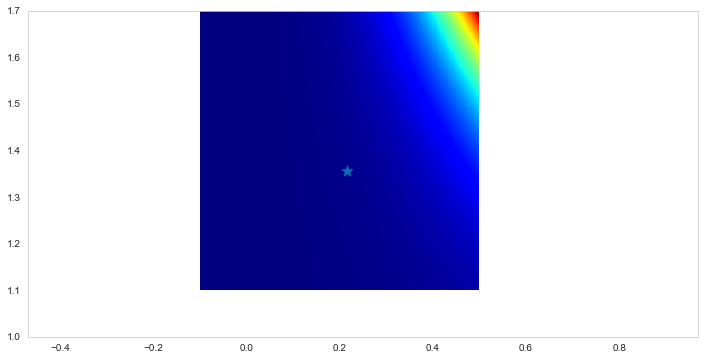

In [3692]:
def get_likelihood(px, py, sigma=5):
    return lambda x : np.exp(-(x[0]*x[1]**px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

px, py = xs[1], np.array(df['total_cases'][:r])[1]
cur_likelihood = get_likelihood(px, py)
print(cur_likelihood)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])
print(len(Z))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-3, 3))
myplot_heatmap(Z)

In [3700]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.1):
    x_matrix = np.array([[1] + [i for i in x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

[[1 2]]


C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_23236/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


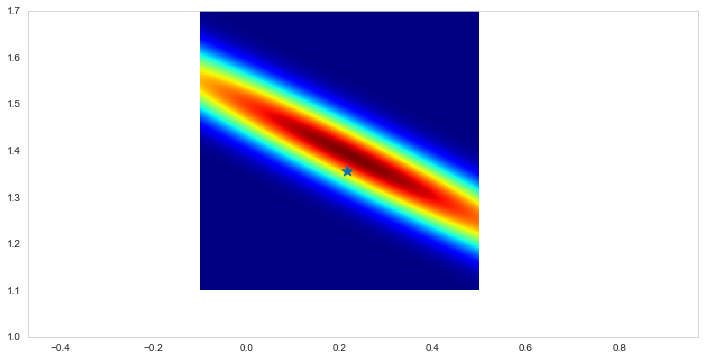

In [3694]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((0, 6))
myplot_heatmap(Z)

In [3642]:
py

3.0

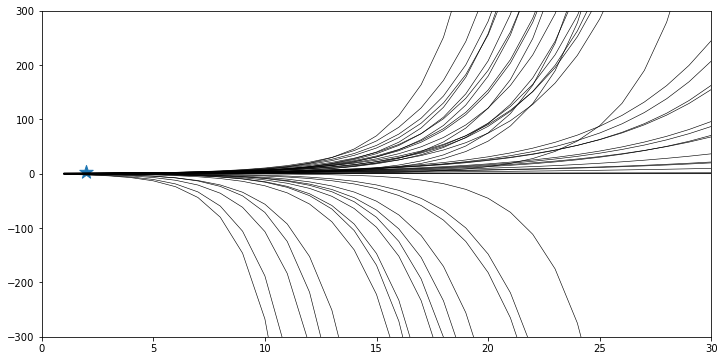

In [114]:
# Посэмплируем и порисуем прямые
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((1, 5))
myplot_sample_lines(cur_mu, cur_sigma, 50, points=[[px], [py]])

In [115]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] * w[1]**xs
    return res

In [116]:
xs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [117]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((0, 500))
    ax.plot(xs, res_curve(xs), label="Предполагаемый правильный ответ")
    ax.plot(xs,  mu[0] * mu[1]**xs, color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[1]**xs * mu[0] - .25, mu[1]**xs * mu[0] + .25, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)

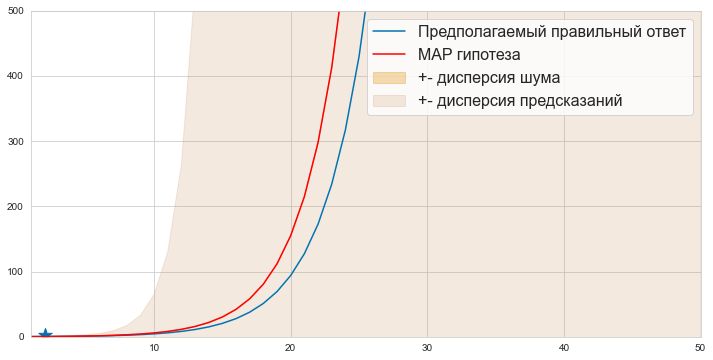

In [123]:
x = sample_statistics(cur_mu, cur_sigma, xs, n=1000)
plot_predictions(xs, cur_mu, x, [[px], [py]])

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_10016/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


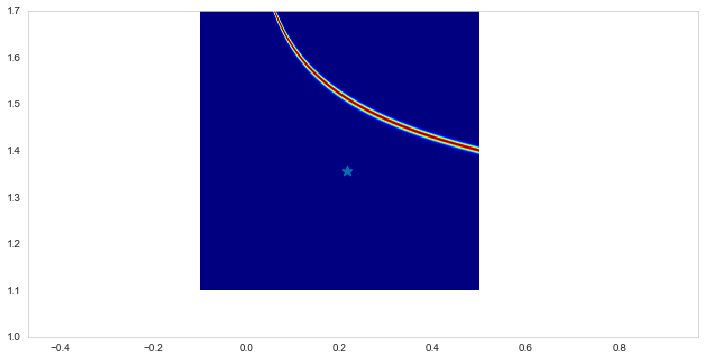

In [124]:
px2, py2 = xs[10], np.array(df['total_cases'][:r])[7]
cur_likelihood = get_likelihood(px2, py2)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-3, 3))
myplot_heatmap(Z)

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_10016/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


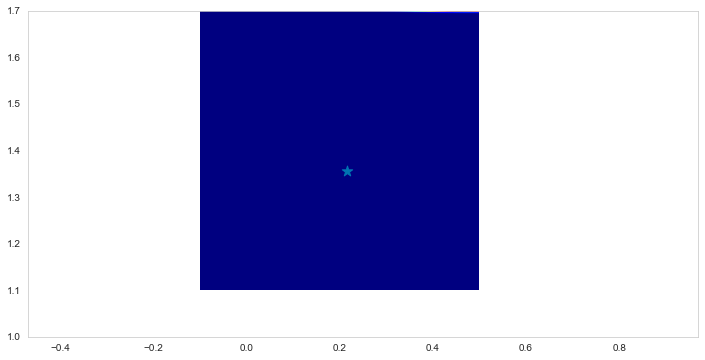

In [125]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px2, py2)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
myplot_heatmap(Z)

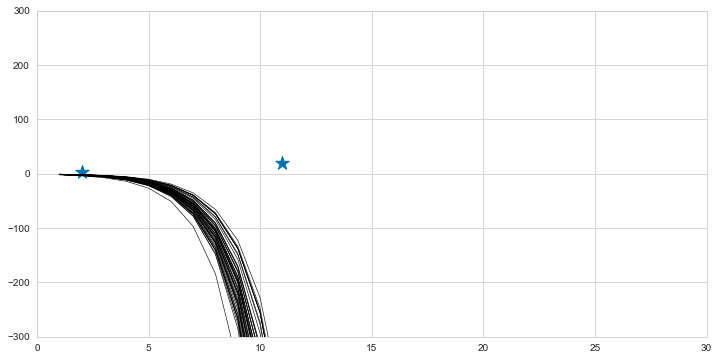

In [126]:
# Посэмплируем и порисуем прямые
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-3, 3))
myplot_sample_lines(cur_mu, cur_sigma, n=50, points=[[px, px2], [py, py2]])

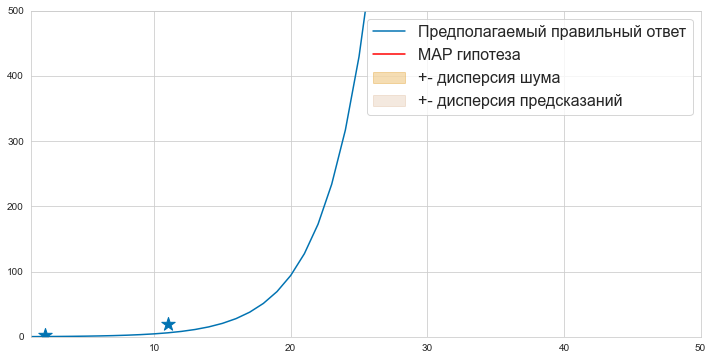

In [127]:
x = sample_statistics(cur_mu, cur_sigma, xs, n=2000)
plot_predictions(xs, cur_mu, x, [[px, px2], [py, py2]])

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_10016/4018708546.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


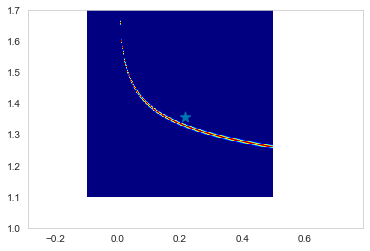

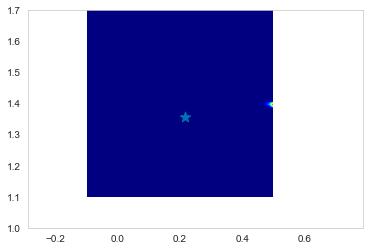

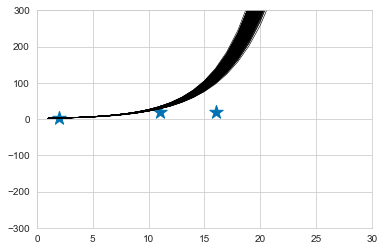

In [128]:
px3, py3 = xs[15], np.array(df['total_cases'][:r])[8]
cur_likelihood = get_likelihood(px3, py3)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])
myplot_heatmap(Z)
plt.show()
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px3, py3)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)
plt.show()
myplot_sample_lines(cur_mu, cur_sigma, n=200, points=[[px, px2, px3], [py, py2, py3]])
plt.show()

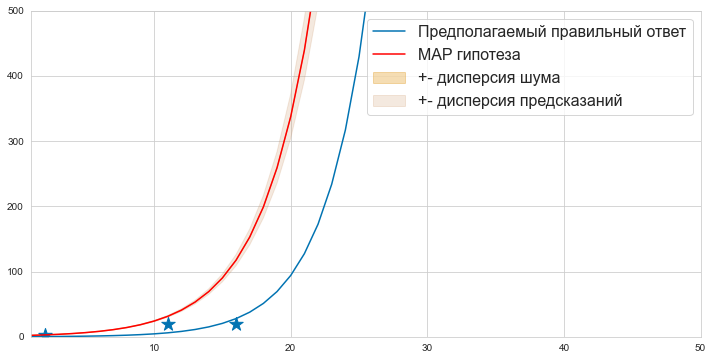

In [129]:
x = sample_statistics(cur_mu, cur_sigma, xs, n=2000)
plot_predictions(xs, cur_mu, x, [[px, px2, px3], [py, py2, py3]])

In [130]:
xs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Предсказательные распределения

In [131]:
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] * w[1]**xs
    return res

In [132]:
day = np.arange(1, 183, 1)

In [133]:
x_may = sample_statistics(cur_mu, cur_sigma, day[:59], n=300)
x_june = sample_statistics(cur_mu, cur_sigma, day[:90], n=300)
x_september = sample_statistics(cur_mu, cur_sigma, day[:182], n=300)

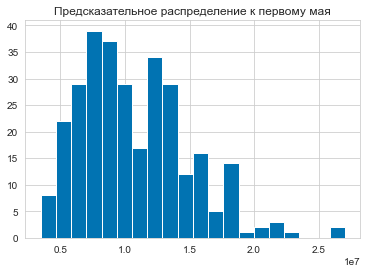

In [134]:
plt.title("Предсказательное распределение к первому мая")
plt.hist(x_may[:, -1], bins=20)
plt.show()

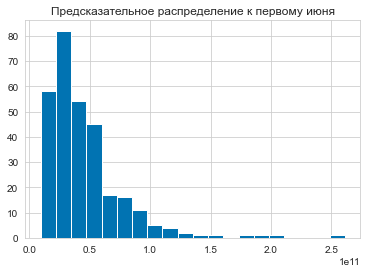

In [135]:
plt.title("Предсказательное распределение к первому июня")
plt.hist(x_june[:, -1], bins=20)
plt.show()

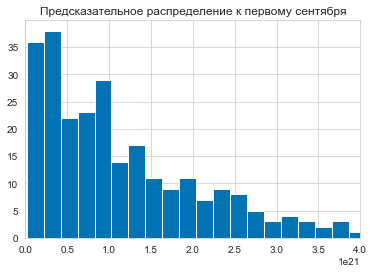

In [136]:
plt.title("Предсказательное распределение к первому сентября")
plt.hist(x_september[:, -1], bins=200)
plt.xlim(-1, 0.04*(10**23))
plt.show()

Сигмоидальное распределение

Если продифференцировать обе части предложенного уравнения сигмоиды а также взять в логарифм, то получим выражение, которое можно охарактеризовать полином как вида a*x^2+b*x +c

Таким образом можно просуммировать прогнозы новых приращений для получения прогноза заболеваемости на конкретную дату

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


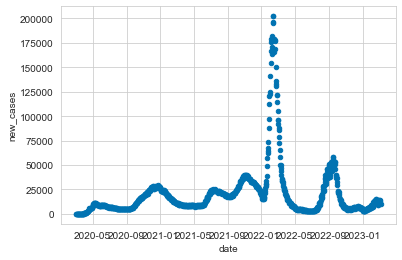

In [137]:
df.plot.scatter(x="date", y="new_cases");

In [141]:
df['new_cases'] = df['new_cases'].replace([0], 1)

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_10016/615032461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_cases'] = df['new_cases'].replace([0], 1)


In [142]:
x = np.arange(1, 201, 1)
y = np.array(df['new_cases'][:200])

In [143]:
fit = np.polyfit(x, np.log(y), 2)

In [144]:
print(fit)

[-4.83428831e-04  1.20121672e-01  2.24390243e+00]


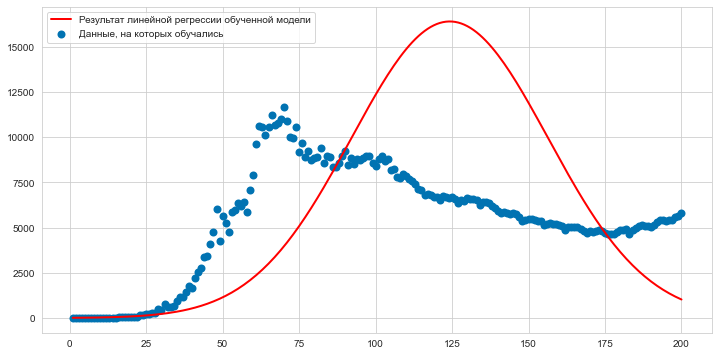

In [146]:
N = 250
true_mu = [-0.000483428831,  0.120121672, 2.24390243]
# true_mu = [-0.767541837,  174.174897, -1759.04385]
# true_mu = [0.00604237968,  -2.58931931, 321.011370, -4249.17075]
# true_mu = [0.000121050008,  -0.0426197233, 3.70903363, 38.0412405, -1341.53224]
def res_curve(x):
#     return true_mu[0]*x**3 + true_mu[1]*x**2 + true_mu[2]*x + true_mu[3]
#     return true_mu[0]*x**4 + true_mu[1]*x**3 + true_mu[2]*x**2 + true_mu[3]*x + true_mu[3]
    return np.exp(true_mu[0]*x**2 +  true_mu[1]*x + true_mu[2])
r = 200
xs = np.arange(1, r+1, 1)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, res_curve(xs), linewidth=2, label=r"Результат линейной регрессии обученной модели", color='r')
ax.scatter(xs, np.array(df['new_cases'][:r]), linewidth=2, label=r"Данные, на которых обучались")
ax.legend(loc="upper left", fontsize=10)
plt.show()

In [147]:
x = np.arange(1, 301, 1)

In [148]:
y_pred = res_curve(x)
# y_pred[y_pred < 0] = 0
y_pred_total = np.cumsum(y_pred)

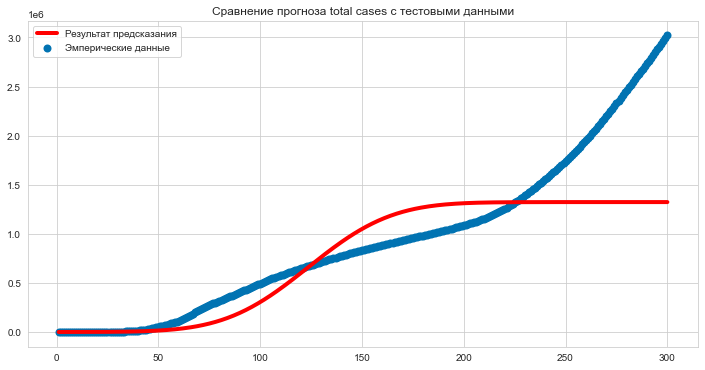

In [149]:
r = 300
xs = np.arange(1, r+1, 1)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plt.title("Сравнение прогноза total cases с тестовыми данными")
ax.plot(x, y_pred_total, linewidth=4, label=r"Результат предсказания", color='r')
ax.scatter(x, np.array(df['total_cases'][:r]), linewidth=2, label=r"Эмперические данные")
ax.legend(loc="upper left", fontsize=10)
plt.show()

In [ ]:
def sample_statistics_2(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.cumsum(np.exp(w[2] + w[1]*xs + w[0]*xs**2))
    return res

In [152]:
def myplot_sample_lines_sigmoid(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(xs, np.exp(w[0]*xs**2 + w[1]*xs + w[2]), 'k-', lw=.6)
    plt.ylim((-300, 300))
    plt.xlim((0, 30))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

In [3548]:
def sample_statistics_2(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.cumsum(np.exp(w[2] + w[1]*xs + w[0]*xs**2))
    return res

def myplot_sample_lines_2(mu, sigma, xs, n=20, points=None, title=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    for w in my_w:
        plt.plot(xs, np.cumsum(np.exp(w[2] + w[1]*xs + w[0]*xs**2)), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

In [3654]:
new_cases_cur_mu_2, new_cases_cur_sigma_2 = np.zeros(3), 5 * np.eye(3)
new_cases_sigma_noise_2 = (y_pred_total - df['total_cases'][:300]).std()

In [3711]:
cur_mu

array([-4.83428831e-04,  1.20121672e-01,  2.24390243e+00])

In [3709]:
cur_mu = np.array([-0.000483428831,  0.120121672, 2.24390243])
# cur_sigma = 5 * np.eye(3)
sigma_noise = 0.5

In [3708]:
x2 = np.arange(1, 201,)
y2 = np.array(df['new_cases'][:200])
for i in range(1, 100, 1):
    px, py = x2[i], y2[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, [px, px**2], py)

    
print(cur_mu)

[-2.00322985e+03  1.81736510e+02 -8.03224370e-01]


In [3710]:
xs = np.arange(len(df))
x = sample_statistics_2(cur_mu, cur_sigma, xs, n=300)
print(f"Прогноз случаев заражения на текущий момент в среднем: {int(np.mean(x, axis=0)[-1])}")
print("Случаев заражения, согласно тестовому набору данных:", int(df.iloc[-1]["total_cases"]))
myplot_sample_lines_2(cur_mu, cur_sigma, xs, 300, points=[xs, df["total_cases"][:]], title="Прогноз случаев заражения на текущий момент")
plt.show()

C:\Users\SKIENB~1\AppData\Local\Temp/ipykernel_23236/1191274181.py:5: RuntimeWarning: overflow encountered in exp
  res[i,:] = np.cumsum(np.exp(w[2] + w[1]*xs + w[0]*xs**2))


OverflowError: cannot convert float infinity to integer